In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [2]:
edges = pd.read_csv('edges.csv', sep=',')
nodelist = pd.read_csv('nodelist.csv', sep=',')
G = nx.from_pandas_edgelist(edges, '# source', ' target')

In [3]:
node_attr = dict(nodelist.club)
nx.set_node_attributes(G, node_attr, 'club')
nx.attribute_assortativity_coefficient(G, 'club')

0.7135125993573483

In [4]:
cluster_co_attr = nx.clustering(G)
nx.set_node_attributes(G, cluster_co_attr, 'cluster_coefficient')
G.nodes(data = True)

NodeDataView({0: {'club': 'Mr. Hi', 'cluster_coefficient': 0.15}, 1: {'club': 'Mr. Hi', 'cluster_coefficient': 0.3333333333333333}, 2: {'club': 'Mr. Hi', 'cluster_coefficient': 0.24444444444444444}, 3: {'club': 'Mr. Hi', 'cluster_coefficient': 0.6666666666666666}, 4: {'club': 'Mr. Hi', 'cluster_coefficient': 0.6666666666666666}, 5: {'club': 'Mr. Hi', 'cluster_coefficient': 0.5}, 6: {'club': 'Mr. Hi', 'cluster_coefficient': 0.5}, 7: {'club': 'Mr. Hi', 'cluster_coefficient': 1.0}, 8: {'club': 'Mr. Hi', 'cluster_coefficient': 0.5}, 10: {'club': 'Mr. Hi', 'cluster_coefficient': 0.6666666666666666}, 11: {'club': 'Mr. Hi', 'cluster_coefficient': 0}, 12: {'club': 'Mr. Hi', 'cluster_coefficient': 1.0}, 13: {'club': 'Mr. Hi', 'cluster_coefficient': 0.6}, 17: {'club': 'Mr. Hi', 'cluster_coefficient': 1.0}, 19: {'club': 'Mr. Hi', 'cluster_coefficient': 0.3333333333333333}, 21: {'club': 'Mr. Hi', 'cluster_coefficient': 1.0}, 31: {'club': 'Officer', 'cluster_coefficient': 0.2}, 30: {'club': 'Office

In [5]:
# Cosine similarity value
repeated_list = []
sorted_dict = {}

adj_A = nx.to_numpy_matrix(G)
cos_sim_A = cosine_similarity(adj_A)
idx = np.argsort(cos_sim_A, axis=None)[::-1]
rows, cols = np.unravel_index(idx, cos_sim_A.shape)
A_sorted = cos_sim_A[rows, cols]

for r, c, v in zip(rows, cols, A_sorted):
    total_no = r + c
    if (r == c or total_no in repeated_list): continue
    else:
        sorted_dict[r, c] = v
        repeated_list.append(total_no)

max_cos=dict(sorted(sorted_dict.items(), key=lambda x: x[1],reverse=True)[:6])
print(max_cos)

{(32, 31): 0.9999999999999998, (30, 29): 0.9999999999999998, (30, 31): 0.9999999999999998, (30, 32): 0.9999999999999998, (15, 13): 0.9999999999999998, (29, 31): 0.9999999999999998}


In [6]:
# Jaccard similarity value
repeated_list = []
sorted_dict = {}

sims = np.zeros((len(G.nodes),len(G.nodes)))
letter2index = dict(zip(list(G.nodes),range(sims.shape[0])))
for i in nx.jaccard_coefficient(G):
    sims[letter2index[i[0]],letter2index[i[1]]] = i[2]
idx = np.argsort(sims, axis=None)[::-1]
rows, cols = np.unravel_index(idx, sims.shape)
A_sorted = sims[rows, cols]

for r, c, v in zip(rows, cols, A_sorted):
    total_no = r + c
    if (r == c or total_no in repeated_list): continue
    else:
        sorted_dict[r, c] = v
        repeated_list.append(total_no)

max_jac=dict(sorted(sorted_dict.items(), key=lambda x: x[1],reverse=True)[:6])
print(max_jac)

{(30, 31): 1.0, (13, 15): 1.0, (29, 31): 1.0, (29, 30): 1.0, (30, 32): 1.0, (31, 32): 1.0}


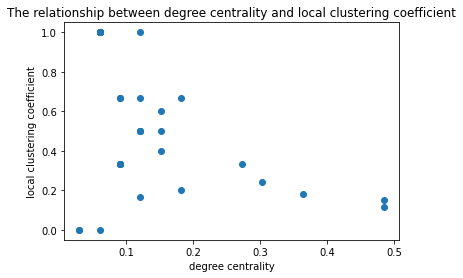

In [7]:
x_coords = [i for i in nx.degree_centrality(G).values()]
y_coords = [i for i in nx.clustering(G).values()]
plt.title('The relationship between degree centrality and local clustering coefficient')
plt.xlabel('degree centrality')
plt.ylabel('local clustering coefficient')
plt.scatter(x_coords, y_coords)